In [1]:

!pip install xgboost


import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [2]:

df = pd.read_csv("loan_data.csv") 

In [3]:
df.drop(columns=['loan_id', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value'], inplace=True)

In [4]:

label_encoders = {}
for col in [" education", " self_employed", " loan_status"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    



In [5]:
X = df.drop(columns=[" loan_status"])  
y = df[" loan_status"]



In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



##### Decision TREE

In [7]:

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)



##### Random Forest

In [8]:

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)



##### XG boost

In [15]:

xgb_model = xgb.XGBClassifier(objective="binary:logistic", eval_metric="logloss", random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)



In [13]:

print(" Model Performance:")
print(f"Decision Tree Accuracy: {dt_accuracy:}")
print(f"Random Forest Accuracy: {rf_accuracy:}")
print(f"XGBoost Accuracy: {xgb_accuracy:}")



 Model Performance:
Decision Tree Accuracy: 0.9812646370023419
Random Forest Accuracy: 0.9789227166276346
XGBoost Accuracy: 0.9836065573770492


Text(0.5, 1.0, ' XGBoost Feature Importance')

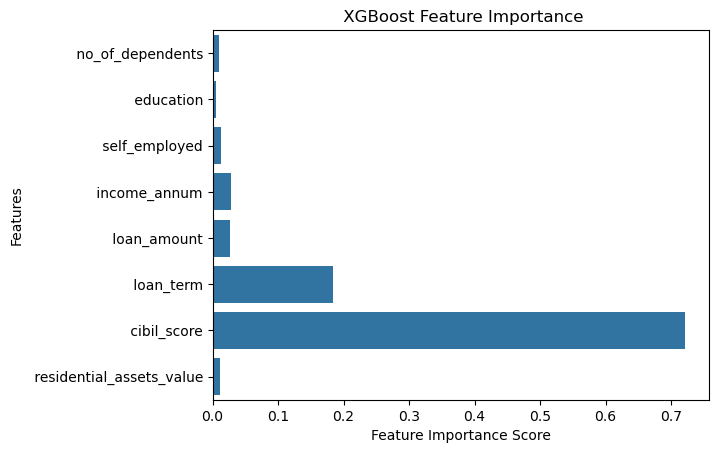

In [14]:
sns.barplot(x=xgb_model.feature_importances_, y=X.columns)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title(" XGBoost Feature Importance")
